전날 한 iris 데이터

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    stratify=iris.target,
                                                    random_state=7,
                                                    test_size=0.3)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_zs = scaler.transform(x_train)
x_test_zs = scaler.transform(x_test)
print(x_train_zs.shape, y_test.shape)

(105, 4) (45,)


In [4]:
from tensorflow.keras.utils import to_categorical

print(y_train)
y_train_oh = to_categorical(y_train) # 원-핫 인코딩
y_test_oh = to_categorical(y_test)
print(y_train_oh)
print(y_test_oh.shape)

[1 0 2 2 0 0 2 2 0 2 0 1 1 2 2 1 0 0 2 1 2 1 1 2 1 1 2 0 2 0 0 1 2 2 1 1 2
 0 1 1 2 2 0 2 0 0 1 0 1 0 1 2 1 1 0 1 2 2 0 0 2 2 0 1 0 0 2 0 1 2 0 1 1 0
 0 1 0 0 0 1 1 1 0 1 1 2 1 2 0 1 1 1 2 0 2 2 0 2 2 2 0 0 2 2 1]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

iris_model = Sequential()
iris_model.add(Input(shape=(4,)))
iris_model.add(Dense(16, activation='relu'))
iris_model.add(Dense(32, activation='relu'))
iris_model.add(Dense(16, activation='relu'))
iris_model.add(Dense(3, activation='softmax'))
# 클래스가 3개이므로 출력 뉴런 수는 3개, softmax는 각 클래스에 대한 확률(0~1)을 출력함
# 정답 레이블이 0, 1, 2인 경우 → 모델이 categorical_crossentropy 손실 함수를 사용한다면,
# 이를 [1,0,0], [0,1,0], [0,0,1] 형태의 원-핫 인코딩으로 변환해야 함
iris_model.summary()

iris_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# categorical_crossentropy는 다중 클래스 문제에서 softmax 확률과 원-핫 인코딩 레이블 간의 cross entropy 계산
iris_model.fit(x_train_zs, y_train_oh,
               validation_data=(x_test_zs, y_test_oh),
               epochs=50)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,203 (4.70 KB)

 Trainable params: 1,203 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.2331 - loss: 1.1814 - val_accuracy: 0.3333 - val_loss: 1.1532
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.3035 - loss: 1.1297 - val_accuracy: 0.3778 - val_loss: 1.1057
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.2965 - loss: 1.1111 - val_accuracy: 0.3778 - val_loss: 1.0631
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.3468 - loss: 1.0441 - val_accuracy: 0.4000 - val_loss: 1.0249
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.4932 - loss: 0.9939 - val_accuracy: 0.5556 - val_loss: 0.9899
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5806 - loss: 0.9532 - val_accuracy: 0.7111 - val_loss: 0.9581
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6482 - loss: 0.9337 - val_accuracy: 0.7778 - val_loss: 0.9269
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8082 - loss: 0.8916 - val_accuracy: 0.8444 - val_loss: 0.8

In [8]:
pred = iris_model.predict(x_test_zs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [9]:
pred.shape

(45, 3)

In [16]:
import numpy as np
print(np.argmax(pred, axis=1)) # 맥스값을 가지고 있는 인덱스 반환
# print(pred[:,np.argmax(pred, axis=1)])
print(np.max(pred, axis=1)) # pred에서 축1에 대해서 max값 반환

[1 1 2 0 1 0 2 2 2 0 0 2 0 1 1 1 2 1 2 2 0 1 2 1 1 0 0 2 0 2 1 1 1 0 0 2 1
 0 1 0 2 2 2 0 0]
[0.8778913  0.8903644  0.75763655 0.9967823  0.9084873  0.9976128
 0.6293325  0.9417883  0.56521344 0.99834067 0.98367584 0.9522418
 0.9959085  0.58540046 0.64600533 0.65065336 0.8843305  0.90982586
 0.80196047 0.6507271  0.9910286  0.82951427 0.5543659  0.63591576
 0.86056405 0.9929436  0.99159986 0.9386769  0.9965675  0.94858676
 0.97986746 0.50233    0.8721017  0.97358334 0.99240595 0.8196096
 0.6959069  0.9823002  0.80285054 0.9886398  0.7879751  0.7631645
 0.97619087 0.99301356 0.99209845]


CNN

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


5


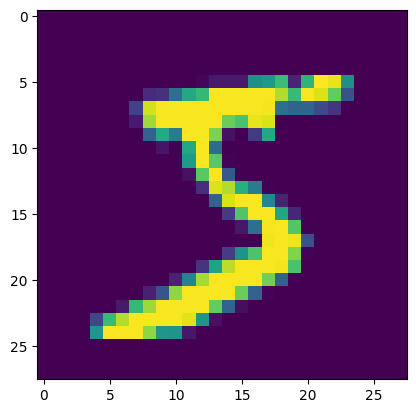

In [4]:
import matplotlib.pyplot as plt

print(y_train[0])
plt.imshow(x_train[0])
plt.show()

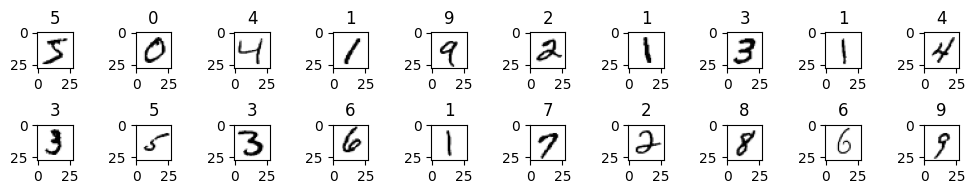

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=10, layout='tight', figsize=(10,2))
for i in range(20):
  axs.flat[i].set_title(y_train[i])
  axs.flat[i].imshow(x_train[i], cmap='Greys')
plt.show()

In [14]:
import numpy as np
np.min(x_train), np.max(x_train)

(np.uint8(0), np.uint8(255))

In [15]:
# 입력 데이터 전처리 Min-Max 정규화 (0~1) -> 최댓값 255, 최솟값 0이란걸 알고 있기 때문 (x - 0) / (255 - 0)
x_train_1d = x_train.reshape((60000, -1)) / 255 # 1차원 벡터로 변환 (60000, 28, 28) → (60000, 784), -1의 의미 : 나머지 차원은 자동 계산해줘
x_test_1d = x_test.reshape((10000, -1)) / 255 # (10000, 28, 28) → (10000, 784)
print(x_train_1d.shape, x_test_1d.shape, np.max(x_train_1d))

(60000, 784) (10000, 784) 1.0


데이터를 활용해 모델 만들기

In [20]:
# 강사님 풀이
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print(y_train_oh.shape, y_test_oh.shape)

(60000, 10) (10000, 10)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

mnist_nn = Sequential()
mnist_nn.add(Input(shape=(784,)))
mnist_nn.add(Dense(512, activation='relu'))
mnist_nn.add(Dense(128, activation='relu'))
mnist_nn.add(Dense(10, activation='softmax'))
mnist_nn.summary()

mnist_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mnist_nn.fit(x_train_1d, y_train_oh,
             validation_data=(x_test_1d, y_test_oh),
             epochs=5)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9014 - loss: 0.3230 - val_accuracy: 0.9706 - val_loss: 0.0912
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9754 - loss: 0.0797 - val_accuracy: 0.9685 - val_loss: 0.0961
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9837 - loss: 0.0507 - val_accuracy: 0.9789 - val_loss: 0.0746
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9868 - loss: 0.0397 - val_accuracy: 0.9768 - val_loss: 0.0738
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9896 - loss: 0.0307 - val_accuracy: 0.9746 - val_loss: 0.1015


In [26]:
# 내풀이
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical

# 레이블 원-핫 인코딩
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

data_nn = Sequential()
data_nn.add(Input(shape=(784,)))
data_nn.add(Dense(512, activation='relu'))
data_nn.add(Dense(128, activation='relu'))
data_nn.add(Dense(64, activation='relu'))
data_nn.add(Dense(10, activation='softmax'))
data_nn.summary()

data_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = data_nn.fit(x_train_1d, y_train_oh,
                   validation_data=(x_test_1d, y_test_oh),
                   epochs=5)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,490 (1.82 MB)

 Trainable params: 476,490 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8879 - loss: 0.3707 - val_accuracy: 0.9676 - val_loss: 0.1024
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9717 - loss: 0.0901 - val_accuracy: 0.9733 - val_loss: 0.0891
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.9813 - loss: 0.0596 - val_accuracy: 0.9722 - val_loss: 0.0925
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - accuracy: 0.9869 - loss: 0.0423 - val_accuracy: 0.9767 - val_loss: 0.0818
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.9891 - loss: 0.0319 - val_accuracy: 0.9778 - val_loss: 0.0817


fetch_lfw_people 데이터 사용하기

In [29]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=100) # 한 사람이 최소 100장 이상의 얼굴 이미지가 있어야만 가져와라
print(lfw_people.images.shape, lfw_people.data.shape)
print(lfw_people.target_names)

(1140, 62, 47) (1140, 2914)
['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [30]:
np.min(lfw_people.images), np.max(lfw_people.images) # 이미지 데이터의 픽셀 값 범위를 확인하기 위함

(np.float32(0.0), np.float32(1.0))

In [34]:
print(lfw_people.images[0][20:25,25:35]) # 1이 밝은색 이고 0이 어두운색

[[0.3751634  0.37124184 0.37254906 0.34509805 0.29542485 0.2875817
  0.34771243 0.32941177 0.40522876 0.49803925]
 [0.4509804  0.43790853 0.37908497 0.42352942 0.3895425  0.18562092
  0.09019608 0.07843138 0.15294118 0.22875817]
 [0.6052287  0.52026147 0.49411765 0.58431375 0.5908497  0.28627452
  0.17254902 0.16601308 0.29281047 0.32156864]
 [0.6901961  0.64575166 0.59869283 0.6013072  0.6156863  0.5398693
  0.5045752  0.5019608  0.58954245 0.579085  ]
 [0.6836601  0.68235296 0.6535948  0.654902   0.654902   0.675817
  0.6418301  0.66928107 0.7058824  0.69673204]]


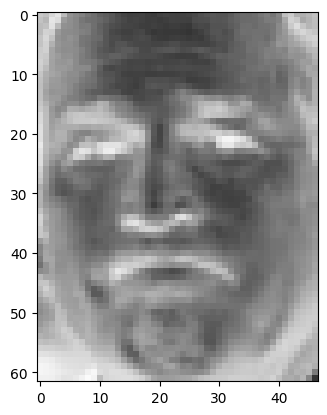

In [31]:
plt.imshow(lfw_people.images[0], vmin=0, vmax=1, cmap='Greys') # 이미지에서 최소, 최대 픽셀 값이 어떤 값으로 매핑
plt.show()

In [51]:
# 강사님 풀이
lfw_people.target

array([2, 3, 1, ..., 4, 2, 4])

In [52]:
np.unique(lfw_people.target, return_counts=True)

(array([0, 1, 2, 3, 4]), array([236, 121, 530, 109, 144]))

In [53]:
x_data = lfw_people.images
y_data = lfw_people.target
print(x_data.shape, y_data.shape) # 갯수, 가로, 세로

(1140, 62, 47) (1140,)


In [75]:
62*47

2914

In [56]:
x_data_1d = x_data.reshape((1140, -1)) # (1140, 62, 47) -> (1140, (62*47=2914))
print(x_data_1d)
y_data_oh = to_categorical(y_data)
print(y_data_oh.shape)

[[0.32026145 0.34771243 0.26013073 ... 0.4        0.5542484  0.82483655]
 [0.21045752 0.18954249 0.27189544 ... 0.9281046  0.89673203 0.86928105]
 [0.14379086 0.151634   0.16209151 ... 0.3869281  0.2784314  0.23137255]
 ...
 [0.8457516  0.83398694 0.8091503  ... 0.57254905 0.54509807 0.62614375]
 [0.37124184 0.4627451  0.52287585 ... 0.8679738  0.8392157  0.5124183 ]
 [0.13594772 0.3124183  0.427451   ... 0.09411765 0.14248367 0.08366013]]
(1140, 5)


In [62]:
# 기본 MLP(Dense 기반
lfwp_nn = Sequential()
lfwp_nn.add(Input(shape=(2914,)))
lfwp_nn.add(Dense(512, activation='relu'))
lfwp_nn.add(Dense(128, activation='relu'))
lfwp_nn.add(Dense(5, activation='softmax'))
lfwp_nn.summary()

lfwp_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lfwp_nn.fit(x_data_1d, y_data_oh, validation_split=0.3, epochs=20) # validation_split=0.3 훈련 데이터의 일부를 자동으로 검증용으로 사용

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 512)            │     1,492,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,558,789 (5.95 MB)

 Trainable params: 1,558,789 (5.95 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3431 - loss: 2.0725 - val_accuracy: 0.4620 - val_loss: 1.5215
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4679 - loss: 1.4627 - val_accuracy: 0.4708 - val_loss: 1.4372
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5095 - loss: 1.3212 - val_accuracy: 0.5380 - val_loss: 1.3529
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5962 - loss: 1.1492 - val_accuracy: 0.5789 - val_loss: 1.2626
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6375 - loss: 1.0472 - val_accuracy: 0.6462 - val_loss: 1.1485
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6532 - loss: 1.0047 - val_accuracy: 0.6842 - val_loss: 1.0042
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6895 - loss: 0.9109 - val_accuracy: 0.6199 - val_loss: 0.9239
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7066 - loss: 0.8397 - val_accuracy: 0.7222 - v

In [73]:
# Conv2D, MaxPool2D, Flatten를 사용하면
# CNN(Conv2D + MaxPool2D + Flatten 기반)
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

lfwp_cnn = Sequential()
lfwp_cnn.add(Input(shape=(62, 47, 1,))) # (가로 세로 채널)
lfwp_cnn.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu')) # 필터의 사이즈와 갯수를 정해야함. 여기서는 kernel이라고 말함, Conv2D는 이미지 속 중요한 패턴과 특징을 찾음
# padding='same'하기 전에 (None, 60, 45, 32) 결과적으로 이렇게 나오는데 제로패딩을 안 해서 그럼
# 3*3=9,  9*32=288, 288+32(bias)=320
lfwp_cnn.add(MaxPool2D(pool_size=(2,2))) # 최대 풀링 : 특징 맵 크기를 줄여 계산량을 줄이고, 중요한 정보는 유지하기 위해서
lfwp_cnn.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
lfwp_cnn.add(MaxPool2D(pool_size=(2,2)))
# 3*3*32*32+36=9248
lfwp_cnn.add(Flatten())
# 15*11*32=5280

lfwp_cnn.add(Dense(512, activation='relu'))
lfwp_cnn.add(Dense(128, activation='relu'))
lfwp_cnn.add(Dense(5, activation='softmax'))
lfwp_cnn.summary()

lfwp_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lfwp_cnn.fit(x_data, y_data_oh, validation_split=0.3, epochs=30)

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 62, 47, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 31, 23, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 512)            │     2,703,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,779,749 (10.60 MB)

 Trainable params: 2,779,749 (10.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.4043 - loss: 1.4752 - val_accuracy: 0.4620 - val_loss: 1.4472
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.4689 - loss: 1.3802 - val_accuracy: 0.4620 - val_loss: 1.3579
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.4972 - loss: 1.2868 - val_accuracy: 0.5058 - val_loss: 1.3008
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.6405 - loss: 0.9926 - val_accuracy: 0.6433 - val_loss: 0.9020
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8208 - loss: 0.5613 - val_accuracy: 0.7865 - val_loss: 0.6043
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.8942 - loss: 0.3236 - val_accuracy: 0.7982 - val_loss: 0.5393
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.9072 - loss: 0.2643 - val_accuracy: 0.7982 - val_loss: 0.5170
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.9238 - loss: 0.2055 - val_accuracy: 0.

## ✅ CNN(Conv2D, MaxPool2D, Flatten)을 쓰면 좋은 점

### 1. **공간적 구조 유지 (Spatial Structure)**

- `Dense`에 넣기 위해 이미지를 1D로 펼치면(Flatten) → 픽셀 간 관계가 무너짐
- 하지만 **`Conv2D`는 이미지의 형태(2D 구조)를 유지한 채로 특징 추출** 가능
- → "얼굴"처럼 공간적인 의미가 있는 이미지에는 CNN이 훨씬 적합


### 2. **파라미터 수 감소**

- 예: `Flatten()` 후 바로 Dense 연결하면 → 5000~10000개의 입력 → 파라미터 수가 폭증
- `Conv2D`는 **필터 수 × 커널 크기** 정도로만 학습되므로 **적은 파라미터로도 효과적**


### 3. **지역적 특징 추출에 강함**

- `Conv2D`는 이미지의 **작은 영역(커널)**에서 의미 있는 특징을 찾아냄 (눈, 코, 입 등)
- `MaxPool2D`는 **가장 강한 특징만 남겨서 요약**, 잡음 제거 효과 있음


### 4. **과적합 방지 + 일반화 성능 향상**

- CNN은 **중요한 특징만 추출**하고, 전체적인 위치에는 덜 민감
- 이는 실제 데이터에서도 **더 잘 작동하는 모델**을 만들어줘